In [1]:
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv("../.env")

True

##### 相关参数

In [2]:
method = 'aicso3'
categories = 'o2o'
horizon = 1
train_days = 60
val_days = 5
model_name = 'sac_base'
env_name = 'hedge022'
code = 'RB'
direction = 'short'
index = 49

#### 模型所在路径

In [3]:
method1 = 'test' if 'kimto' not in method else 'val'
dirs = os.path.join(
    "../",
    os.environ['RECORDS_PATH'], 'agent', method, 'g_instruments', 'rolling', 'normal_factors3',method1,
    str(train_days), str(val_days), "{0}_{1}".format(categories, str(horizon)),
    str(index), "{0}_{1}_{2}_{3}".format(model_name, env_name, code,
                                         str(direction)))

#### 加载路径下所有的模型的收益

In [4]:
res = []
for file in os.listdir(dirs):
    filename = os.path.join(dirs, file)
    ext = filename.split('.')
    #print(ext)
    if ext[-1] != 'feather':
        continue
    print(filename)
    dt = pd.read_feather(filename)
    dt = dt.set_index('trade_time')
    name = filename.split('/')[-1].split('.')[0]
    res.append({'dt':dt,'name':name})

.././a1records/records/agent/aicso3/g_instruments/rolling/normal_factors3/test/60/5/o2o_1/49/sac_base_hedge022_RB_short/49_model4000_profit.feather
.././a1records/records/agent/aicso3/g_instruments/rolling/normal_factors3/test/60/5/o2o_1/49/sac_base_hedge022_RB_short/49_model1000_profit.feather
.././a1records/records/agent/aicso3/g_instruments/rolling/normal_factors3/test/60/5/o2o_1/49/sac_base_hedge022_RB_short/49_best_model_profit.feather
.././a1records/records/agent/aicso3/g_instruments/rolling/normal_factors3/test/60/5/o2o_1/49/sac_base_hedge022_RB_short/49_model6000_profit.feather
.././a1records/records/agent/aicso3/g_instruments/rolling/normal_factors3/test/60/5/o2o_1/49/sac_base_hedge022_RB_short/49_model2000_profit.feather
.././a1records/records/agent/aicso3/g_instruments/rolling/normal_factors3/test/60/5/o2o_1/49/sac_base_hedge022_RB_short/49_model10000_profit.feather
.././a1records/records/agent/aicso3/g_instruments/rolling/normal_factors3/test/60/5/o2o_1/49/sac_base_hedge022

#### 换算日频收益率

In [5]:
res1 = []
for dm in res:
    ds = dm['dt']
    name = dm['name']
    ds = ds.reset_index()
    ds['trade_date'] = pd.to_datetime(ds['trade_time']).dt.strftime('%Y-%m-%d')
    m1 = ds.groupby('trade_date')['profit'].sum().reset_index()
    m1 = m1.set_index('trade_date')
    m1.columns = [name.split('_')[1]]
    res1.append(m1)
    

<Axes: xlabel='trade_date'>

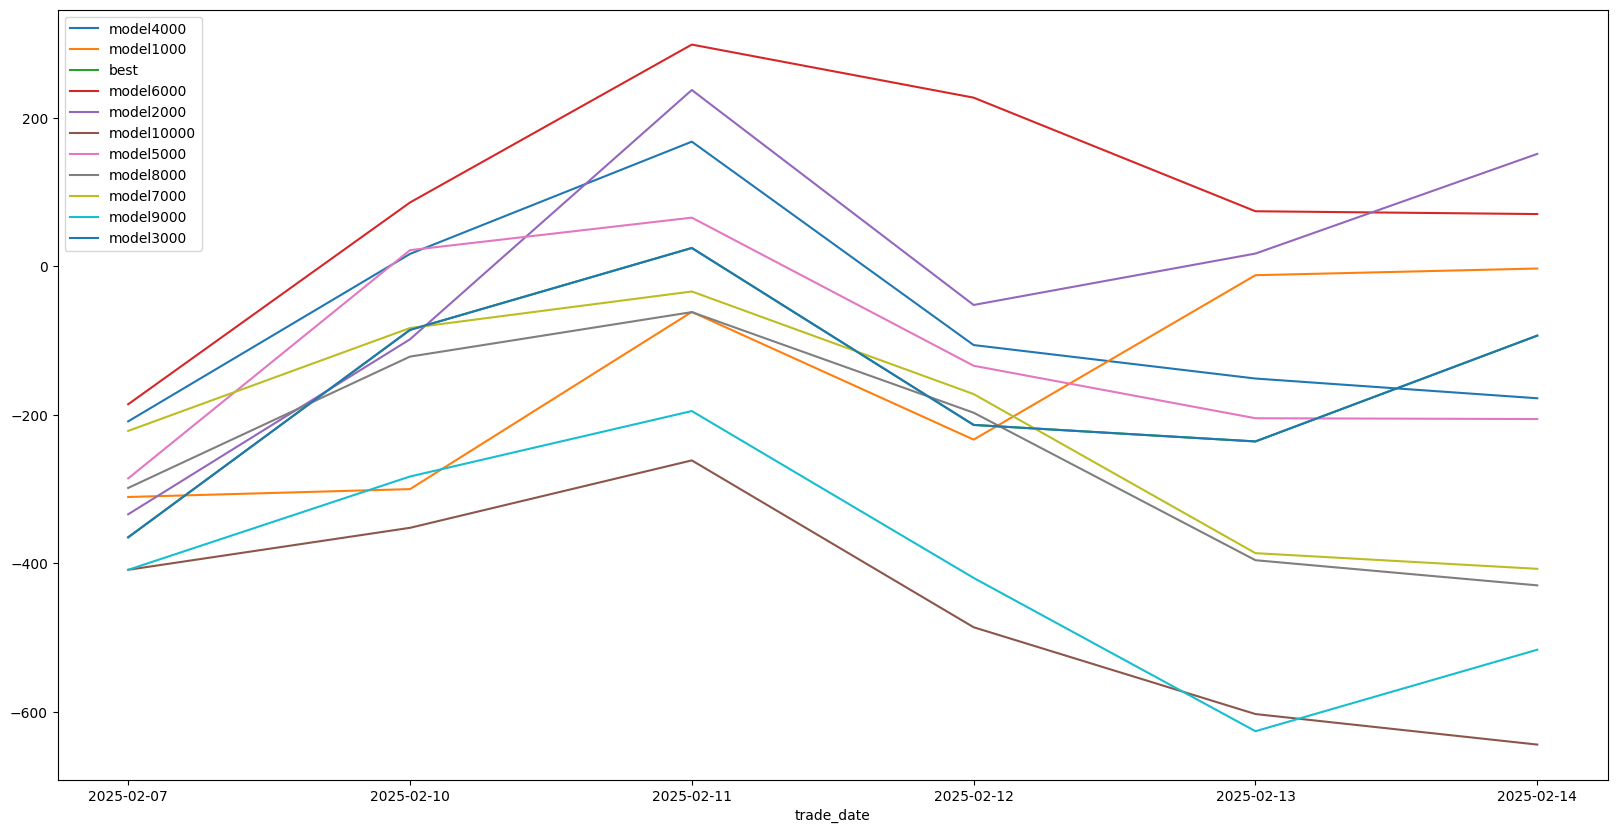

In [6]:
pd.concat(res1, axis=1).cumsum().plot(figsize=(20,10))

In [7]:
df = pd.concat(res1, axis=1).cumsum()
last_row = df.iloc[-1]
sorted_columns = last_row.sort_values(ascending=False).index
df[sorted_columns]

,model2000,model6000,model1000,best,model3000,model4000,model5000,model7000,model8000,model9000,model10000
trade_date,,,,,,,,,,,
2025-02-07,-334.156176,-185.938472,-310.865978,-365.190992,-365.190992,-208.989995,-285.850258,-221.829745,-298.674643,-408.973368,-408.973368
2025-02-10,-98.457718,85.864325,-300.273146,-85.769572,-85.769572,16.590930,21.671720,-83.254274,-121.752013,-283.283742,-352.409630
2025-02-11,237.413224,298.611133,-61.569237,24.593174,24.593174,167.830475,65.460754,-34.027976,-61.810984,-195.108990,-261.570024
2025-02-12,-52.184629,227.111820,-233.587779,-213.787039,-213.787039,-106.189021,-134.073441,-172.228021,-197.324665,-419.888359,-486.349393
2025-02-13,17.081083,74.061732,-12.095558,-236.048274,-236.048274,-151.286665,-204.782978,-386.547724,-396.050645,-626.414273,-603.295142
2025-02-14,151.332761,70.303381,-3.072546,-93.482437,-93.482437,-177.872205,-205.864182,-407.631465,-429.924968,-516.638481,-644.430590


In [7]:
df = pd.concat(res1, axis=1).cumsum()
last_row = df.iloc[-1]
sorted_columns = last_row.sort_values(ascending=False).index
df[sorted_columns]

,model16000,model2000,model15000,model6000,model14000,model13000,model1000,model3000,best,model12000,model4000,model5000,model11000,model7000,model8000,model9000,model10000
trade_date,,,,,,,,,,,,,,,,,
2025-02-07,-254.883049,-334.156176,-160.366528,-185.938472,-211.547292,-280.513380,-310.865978,-365.190992,-365.190992,-247.239841,-208.989995,-285.850258,-293.154406,-221.829745,-298.674643,-408.973368,-408.973368
2025-02-10,55.015940,-98.457718,190.519889,85.864325,165.024773,-85.740890,-300.273146,-85.769572,-85.769572,1.314757,16.590930,21.671720,-34.397255,-83.254274,-121.752013,-283.283742,-352.409630
2025-02-11,431.531153,237.413224,236.812953,298.611133,216.905681,93.456828,-61.569237,24.593174,24.593174,137.028186,167.830475,65.460754,-64.816948,-34.027976,-61.810984,-195.108990,-261.570024
2025-02-12,334.016351,-52.184629,116.397209,227.111820,32.481715,-4.067193,-233.587779,-213.787039,-213.787039,-95.939347,-106.189021,-134.073441,-167.719845,-172.228021,-197.324665,-419.888359,-486.349393
2025-02-13,432.085328,17.081083,199.398980,74.061732,118.301993,91.682136,-12.095558,-236.048274,-236.048274,40.954137,-151.286665,-204.782978,-36.257480,-386.547724,-396.050645,-626.414273,-603.295142
2025-02-14,241.170038,151.332761,91.326174,70.303381,27.600674,11.042011,-3.072546,-93.482437,-93.482437,-126.582861,-177.872205,-205.864182,-221.884036,-407.631465,-429.924968,-516.638481,-644.430590


In [8]:
## 46: model15000
## 47: model8000
## 48: model5000
## 49: model3000

## 46: model16000
## 47: model1000
## 48: model5000
## 49: model8000
